# Sorting

## Setup

In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def gettime(f, *args):
    "Return time in seconds; %time, %timeit don't work in functions so we write our own"
    t0 = time.time()
    f(*args)
    t1 = time.time()
    return t1 - t0

def showtime(f, A, step=1):
    n = len(A)
    times = [gettime(f, A[0:i]) for i in range(1,n,step)]
    plt.figure(figsize=(4,3))
    plt.plot(range(1,n,step), times, '.', color='#fdae61',
             alpha=.8, markersize=10, markeredgewidth=.3, markeredgecolor='grey')
    plt.xlabel("Problem size")
    plt.ylabel("Time in seconds")
    plt.show()

## Bubble sort

In [30]:
def lprint(A,start=-1,stop=-1):
    for i,a in enumerate(A):
        print(f"{a:3}", end=' ')
        print("\b", end="")
        if i>=start and i<=stop: print("\u0332", end="")
        
def bubble(A, verbose=True):
    swapped=True
    second_to_last_idx = len(A)-2
    n = 1
    while swapped:
        swapped=False
        if verbose: print(); lprint(A); print(f"\t\tPass {n}"); n += 1
        for i in range(second_to_last_idx+1):
            if A[i] > A[i+1]:
                A[i], A[i+1] = A[i+1], A[i]
                swapped = True
                if verbose: lprint(A,i,i+1); print(f"\t\tSwap A[{i}], A[{i+1}]")

In [31]:
A = [9,1,4,2,-3]
bubble(A)


  9  1  4  2 -3		Pass 1
  1̲  9̲  4  2 -3		Swap A[0], A[1]
  1  4̲  9̲  2 -3		Swap A[1], A[2]
  1  4  2̲  9̲ -3		Swap A[2], A[3]
  1  4  2 -3̲  9̲		Swap A[3], A[4]

  1  4  2 -3  9		Pass 2
  1  2̲  4̲ -3  9		Swap A[1], A[2]
  1  2 -3̲  4̲  9		Swap A[2], A[3]

  1  2 -3  4  9		Pass 3
  1 -3̲  2̲  4  9		Swap A[1], A[2]

  1 -3  2  4  9		Pass 4
 -3̲  1̲  2  4  9		Swap A[0], A[1]

 -3  1  2  4  9		Pass 5


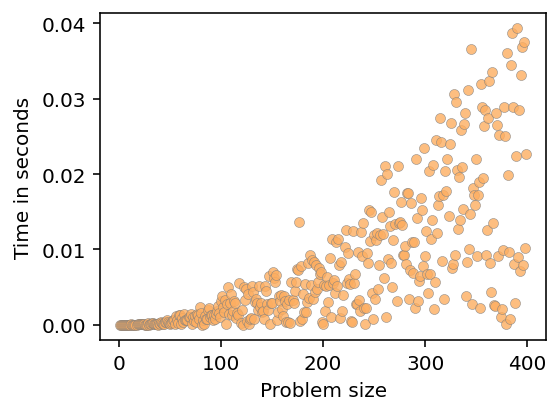

In [42]:
A = np.random.randint(1,100,400)
def quiet_bubble(A): return bubble(A,verbose=False)
showtime(quiet_bubble, A)

## Merge sort

In [19]:
def merge(a,b):
    "Merge two sorted lists in O(nlogn)"
    return sorted(a+b) # cheating: easy but not O(n)
    
def mergesort(data):
    if len(data)==0:
        return []
    if len(data)==1:
        return [data[0]]
    if len(data)==2:
        if data[0]<data[1]:
            return data
        return [data[1], data[0]]

    m = len(data) // 2
    left = mergesort(data[0:m])
    right = mergesort(data[m:])
    return merge(left, right)

In [20]:
data = [1]
print(data, '->', mergesort(data))

data = [5,1]
print(data, '->', mergesort(data))

data = []
print(data, '->', mergesort(data))

data = [10,3,1,10,99,100]
print(data, '->', mergesort(data))

[1] -> [1]
[5, 1] -> [1, 5]
[] -> []
[10, 3, 1, 10, 99, 100] -> [1, 3, 10, 10, 99, 100]


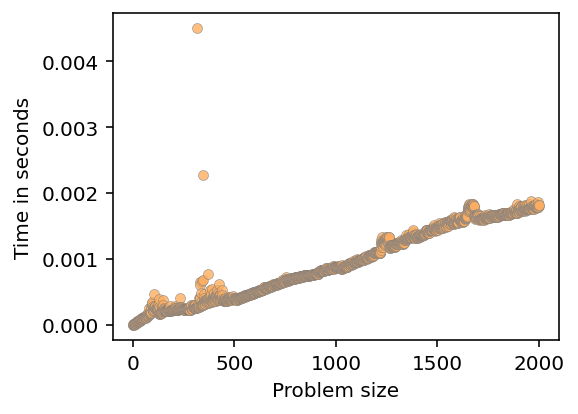

In [21]:
A = list(np.random.randint(1,100,2000))
showtime(mergesort, A)

In [23]:
def merge(a,b):
    "Merge two sorted arrays, returning another"
    i = 0
    j = 0
    c = []
    while i<len(a) and j<len(b):
        if a[i]<b[j]:
            c.append(a[i])
            i += 1
        else:
            c.append(b[j])
            j += 1
    # might have remainders
    if i<len(a):
        for k in range(i,len(a)):
            c.append(a[k])
    elif j<len(b):
        for k in range(j,len(b)):
            c.append(b[k])
    return c

In [24]:
data = [1]
print(data, '->', mergesort(data))

data = [5,1]
print(data, '->', mergesort(data))

data = []
print(data, '->', mergesort(data))

data = [10,3,1,10,99,100]
print(data, '->', mergesort(data))

[1] -> [1]
[5, 1] -> [1, 5]
[] -> []
[10, 3, 1, 10, 99, 100] -> [1, 3, 10, 10, 99, 100]


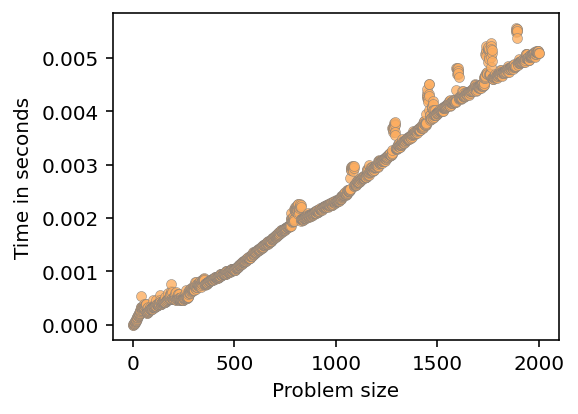

In [25]:
A = list(np.random.randint(1,100,2_000))
showtime(mergesort, A)

## Quicksort

In [79]:
def partition(A,lo,hi):
    pivot = A[hi]    # pick last element as pivot  
    left = [a for a in A if a<pivot]
    right = [a for a in A if a>pivot]
    A[lo:hi+1] = left+[pivot]+right # copy back to A
    return len(left) # return index of pivot

def partition_inplace(A,lo,hi):
    """
    Follows Wikipedia "Lomuto partition scheme" description:
    reorder the array so that all elements with
    values less than the pivot come before the pivot, while
    all elements with values greater than the pivot come after
    it (equal values can go either way).
    """
    i = lo
    pivot = A[hi]    # pick last element as pivot  
    for j in range(lo, hi+1):  
        if A[j] < pivot:   
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

In [118]:
def qsort_(A, lo, hi):
    if lo >= hi: return
    pivot_idx = partition_inplace(A,lo,hi)
    qsort_(A, lo, pivot_idx-1)
    qsort_(A, pivot_idx+1, hi)
    
def qsort(A):
    return qsort_(A, lo=0, hi=len(A)-1)

In [137]:
A = np.random.randint(-2,10,20)
print(A)
qsort(A)
print(A)

[ 7 -1  9  4 -2  0  5  3  8  5  8  3  0 -1  4  1  8 -2  8  0]
[-2 -2 -1 -1  0  0  0  1  3  3  4  4  5  5  7  8  8  8  8  9]


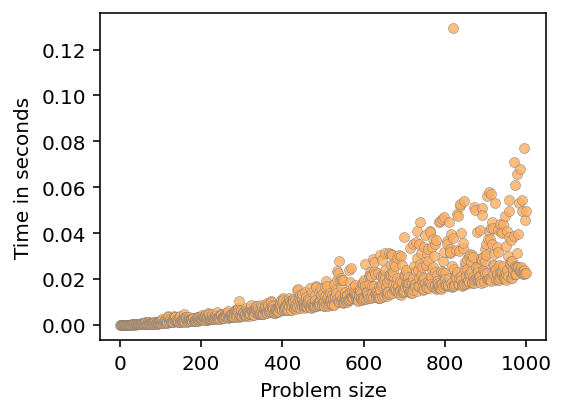

In [144]:
A = np.random.randint(1,100,1000)
showtime(qsort, A)

## Pigeonhole sort

In [162]:
# avoid negative numbers for simplicity
# also assume min(A) is close to 0
def psort(A:list) -> list:
    size = max(A) + 1
    holes = [0] * size
    for a in A:
        holes[a] += 1
    A_ = []
    for i in range(0,size):
        A_.extend([i] * holes[i])
#         for j in range(holes[i]):  # alternative
#             A_.append(i)
    return A_

A = np.random.randint(1,30,10)
psort(A)

[13, 14, 17, 22, 24, 25, 26, 27, 28, 28]

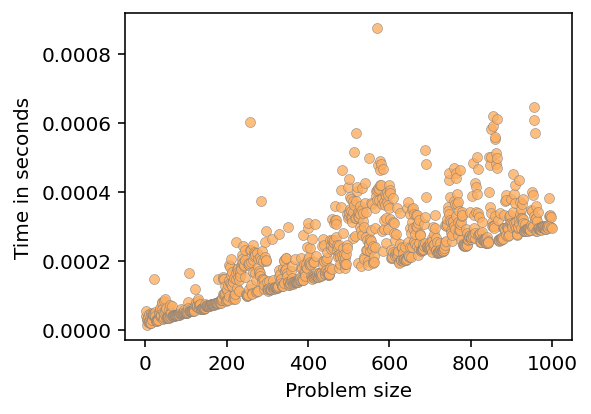

In [147]:
A = np.random.randint(1,100,1000)
showtime(psort, A)

## Bucket sort

In [194]:
import numpy as np

def bsort(A:list, nbuckets=5) -> list:
    mx = max(A)
    buckets = []
    for i in range(nbuckets):
        buckets.append([])
    for a in A:
        a_normalized = a / mx # get into 0..1
        i = int(a_normalized * (nbuckets-1)) # spread across buckets
        buckets[i].append(a)
        
    A_ = []
    for i in range(nbuckets):
        A_.extend( sorted(buckets[i]) )
    return A_

A = np.random.random(size=10) * 100 + 10
bsort(A, 5)

[10.485896155273224,
 11.700464592476292,
 15.2569592226963,
 22.51181859330053,
 27.87062606515304,
 33.03070130895777,
 43.23389898114956,
 59.575707197854,
 96.91790575637343,
 104.67086039323243]

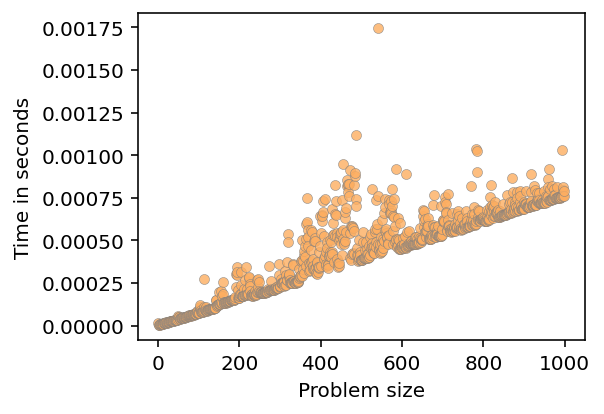

In [195]:
A = np.random.random(size=1000) * 100 + 10
showtime(bsort, A)

## Bucket sort on strings

In [198]:
# assume lowercase English letters for simplicity
def pstr_sort(A:list) -> list:
    size = ord('z') - ord('a') + 1
    holes = []
    for i in range(size):
        holes.append([])
    for s in A:
        i = ord(s[0])-ord('a')
        holes[i].append(s)
    #objviz(holes).view()
    A_ = []
    for i in range(ord('z')-ord('a') + 1):
        A_.extend( sorted(holes[i]) )
    return A_

from lolviz import *

A = ['apple', 'ape', 'zebra', 'cat', 'canary', 'civet', 'dog'] 
pstr_sort(A)


['ape', 'apple', 'canary', 'cat', 'civet', 'dog', 'zebra']